# Plot of stability condition in 3d

In [1]:
%matplotlib notebook

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np 
from matplotlib import cm
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


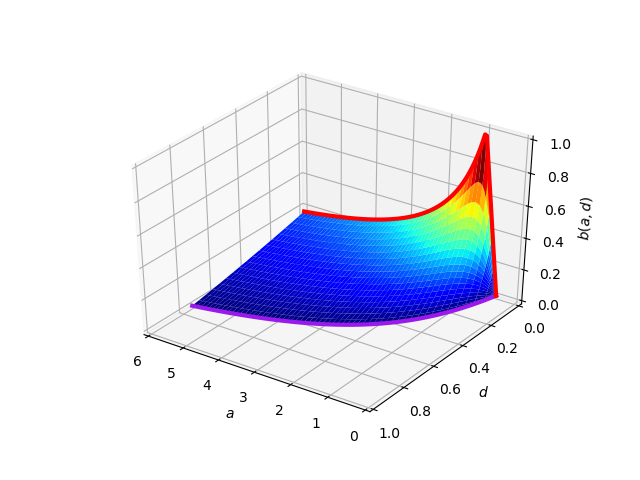

In [6]:
def b2(a,d):
    return (a-np.sqrt(  (1-a-d)**2+4*d) )*(1+a+d-np.sqrt((1-a-d)**2+4*d))/(2*a)
def dm(a):
    return -a + np.sqrt(a**2 + 4*a) - 1
def bm(a):
    
    if type(a) == np.ndarray:
        out = np.empty_like(a)
        a_lt_1 = a[a>1]
        a_gt_1 = a[a<=1]
        out[a>1] = 1/a_lt_1
        
        out[a<=1] =  0.5*(a_gt_1 - np.sqrt((a_gt_1 - 1)**2) + 1)*(a_gt_1 - np.sqrt((a_gt_1 - 1)**2))/a_gt_1
        return out
    else:
        if a>1:
            return 1/a
        else:
            return 0.5*(a - np.sqrt((a - 1)**2) + 1)*(a - np.sqrt((a - 1)**2))/a     
    



step = 0.04
maxval = 1.0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',azim=134)
x = np.linspace(0.5,6,115)
y = np.linspace(0.00,1.,35)
X,Y = np.meshgrid(x,y)
# transform them to cartesian system
X,Y = X,Y*(np.sqrt(X**2+4*X)-(1.0+X))
#Y[:,i((X[7,0]**2+4*X[7,0])**0.5 - (1+X[7,0]) )
#0.99*d(:,i)*((a1.^2+4.*a1)^0.5 - (1+a1) )
Z = b2(X,Y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.jet)
#ax.plot_surface(X, Y, Z,  cmap=cm.jet)
#ax.plot_wireframe(X, Y, Z)
ax.set_zlim3d(0, 1)
ax.set_xlim3d(0, 6)
ax.set_ylim3d(0, 1)
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$d$')
ax.set_zlabel(r'$b(a,d)$')
ax.plot(x, dm(x), np.zeros_like(x), color=(.6,.1,.92),linewidth=3)
ax.plot(x,np.zeros_like(x), bm(x),  color='red',linewidth=3)
ax.plot([0],[0],[0])
ax.view_init(elev=36, azim=125)

plt.show()
plt.savefig("1.png")

In [4]:
bm(np.array(0.8745))

array(0.7490000000000001)